## _*Quantum SVM kernel algorithm:  multiclass classifier extension*_

A multiclass extension works in conjunction with an underlying binary (two class) classifier to provide multiclass classification.

Currently three different multiclass extensions are supported:

* OneAgainstRest
* AllPairs
* ErrorCorrectingCode

These use different techniques to group the data with binary classification to achieve the final multiclass classification.

In [1]:
from datasets import *
from qiskit import Aer
from qiskit_aqua.input import SVMInput
from qiskit_aqua import run_algorithm
import numpy as np

Here we choose the `Wine` dataset which has 3 classes.

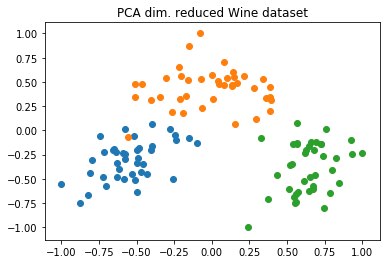

In [2]:
n = 2  # dimension of each data point
sample_Total, training_input, test_input, class_labels = Wine(training_size=40,
                                                              test_size=10, n=n, PLOT_DATA=True)

temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

Now we setup an Aqua configuration dictionary to use the quantum `QSVMKernel` algorithm and add a multiclass extension to classify the Wine data set, since it has 3 classes.

Although the `AllPairs` extension is used here in the example the following multiclass extensions would also work:

    'multiclass_extension': {'name': 'OneAgainstRest'}
    'multiclass_extension': {'name': 'ErrorCorrectingCode', 'code_size': 5}

In [3]:
aqua_dict = {
    'problem': {'name': 'svm_classification', 'random_seed': 10598},
    'algorithm': {
        'name': 'QSVM.Kernel'
    },
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entangler_map': {0: [1]}},
    'multiclass_extension': {'name': 'AllPairs'},
    'backend': {'shots': 1024}
}

backend = Aer.get_backend('qasm_simulator')
algo_input = SVMInput(training_input, test_input, total_array)
result = run_algorithm(aqua_dict, algo_input, backend=backend)
for k,v in result.items():
    print("'{}' : {}".format(k, v))


'testing_accuracy' : 0.8695652173913043
'test_success_ratio' : 0.8695652173913043
'predicted_labels' : [0 0 0 0 0 0 1 0 0 0 1 2 1 1 1 0 1 1 1 1 2 2 2]
'predicted_classes' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'C', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C']
